# S V M

# Importing Libraries

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Including the dataset

In [2]:
df=yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [3]:
# showing first 5 rows of data
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Creating the usable data

In [4]:
df.reset_index(inplace=True)

In [5]:
df=df[['Date','Close']]
df1=df
df.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


# Plotting the growth trend of bitcoin prices

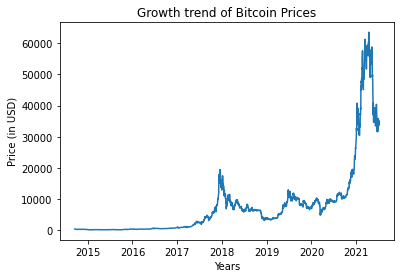

In [6]:
plt.title('Growth trend of Bitcoin Prices')
plt.xlabel('Years')
plt.ylabel('Price (in USD)')
plt.plot(df['Date'],df['Close']);

In [7]:
# Removing the 'Date' column 
df=df[['Close']]

In [8]:
df.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


In [9]:
# Statistical analysis
df.describe()

,Close
count,2482.000000
mean,7996.656113
std,12015.582527
min,178.102997
25%,530.376480
50%,4508.584961
75%,9286.391357
max,63503.457031


In [10]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2482 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


In [11]:
# variable for predicting 'n' days out into the future , here n=30 days
prediction_days=30

In [12]:
# creating another column shifted 'n' units up
df['Prediction']=df[['Close']].shift(-prediction_days)

In [13]:
# showing first 5 rows of data
df.head()

,Close,Prediction
0,457.334015,383.757996
1,424.440002,391.441986
2,394.795990,389.545990
3,408.903992,382.845001
4,398.821014,386.475006


In [14]:
# showing last 7 rows of data
df.tail(7)

,Close,Prediction
2475,33572.117188,NaN
2476,33897.046875,NaN
2477,34668.546875,NaN
2478,35287.781250,NaN
2479,33746.003906,NaN
2480,34235.195312,NaN
2481,34711.722656,NaN


In [15]:
# Creating the independent dataset
X=np.array(df.drop(['Prediction'],1))

In [16]:
# Removing the last 'n' rows
X=X[:len(df)-prediction_days]
X

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [35551.95703125],
       [35862.37890625],
       [33560.70703125]])

In [17]:
# Creating the dependent dataset
Y=np.array(df['Prediction'])
Y=Y[:-prediction_days]
Y

array([  383.75799561,   391.44198608,   389.54598999, ...,
       33746.00390625, 34235.1953125 , 34711.72265625])

# Splitting into Training and Testing data

In [18]:
from sklearn.model_selection import train_test_split

# split the data into 80% training data, 20% testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
prediction_days_array=np.array(df.drop(['Prediction'],1))[-prediction_days:]
prediction_days_array

array([[33472.6328125 ],
       [37345.12109375],
       [36702.59765625],
       [37334.3984375 ],
       [35552.515625  ],
       [39097.859375  ],
       [40218.4765625 ],
       [40406.26953125],
       [38347.0625    ],
       [38053.50390625],
       [35787.24609375],
       [35615.87109375],
       [35698.296875  ],
       [31676.69335938],
       [32505.66015625],
       [33723.02734375],
       [34662.4375    ],
       [31637.77929688],
       [32186.27734375],
       [34649.64453125],
       [34434.3359375 ],
       [35867.77734375],
       [35040.8359375 ],
       [33572.1171875 ],
       [33897.046875  ],
       [34668.546875  ],
       [35287.78125   ],
       [33746.00390625],
       [34235.1953125 ],
       [34711.72265625]])

# Model selection : SVM

In [20]:
from sklearn.svm import SVR

# Creating and training the support vector machine (Regression) model using radial basis function
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [21]:
# Testing the model
svr_rbf_confidence=svr_rbf.score(x_test,y_test)

# Accuracy score

In [22]:
print("Accuracy is: %.2f"%(svr_rbf_confidence*100),"%")

Accuracy is: 54.10 %


In [23]:
# Printing the predicted values of the test data
svm_prediction=svr_rbf.predict(x_test)
# print(svm_prediction)
# print()
# Printing the actual values of the test data
# print(y_test)

In [24]:
# creating data frame containing the actual test data and correspondinding predicted value
test_data_prediction={}
test_data_prediction['Actual Test data']=y_test
test_data_prediction['Prediction']=svm_prediction
testDataPrediction=pd.DataFrame(test_data_prediction)
testDataPrediction

,Actual Test data,Prediction
0,9525.363281,9165.970962
1,329.955994,341.118765
2,276.049011,240.622739
3,357.381012,262.313026
4,226.897003,292.682032
...,...,...
486,6890.520020,9617.300075
487,2304.979980,1945.290797
488,447.976013,453.041899
489,6618.140137,6540.286973


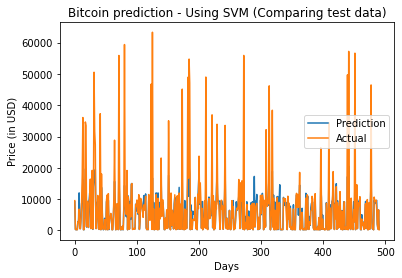

In [25]:
# Comparing the predictions of test data
plt.title('Bitcoin prediction - Using SVM (Comparing test data)')
plt.xlabel('Days')
plt.ylabel('Price (in USD)')
plt.plot(svm_prediction)

plt.plot(y_test);
plt.legend(['Prediction','Actual']);

In [26]:
# Printing the model predictions for next 30 days
svm_prediction=svr_rbf.predict(prediction_days_array)
print("Predicted Price of last 30 days: ",svm_prediction)
print()
print("Actual values of last 30 days: ",np.array(df['Close'][-prediction_days:]))

Predicted Price of last 30 days:  [15660.58542299 17534.50703098 19710.4786482  17588.51126469
 19076.68901039 17903.76412452 15267.53335992 15455.9770184
 16160.54514811 15544.66112998 19357.89322546 19445.87970112
 19582.39365729 14993.96885046 16805.13265828 15722.91205118
 15311.83825053 14794.94444035 17827.99363033 15308.92657716
 15361.61771561 18946.06558519 14956.04575816 15666.89030806
 15771.67739862 15313.04356731 16175.07531156 15730.84165182
 15635.9786112  15315.75410101]

Actual values of last 30 days:  [33472.6328125  37345.12109375 36702.59765625 37334.3984375
 35552.515625   39097.859375   40218.4765625  40406.26953125
 38347.0625     38053.50390625 35787.24609375 35615.87109375
 35698.296875   31676.69335938 32505.66015625 33723.02734375
 34662.4375     31637.77929688 32186.27734375 34649.64453125
 34434.3359375  35867.77734375 35040.8359375  33572.1171875
 33897.046875   34668.546875   35287.78125    33746.00390625
 34235.1953125  34711.72265625]


In [27]:
# Creating dictionary with keys: 'Actual' and 'Predicted' values for the next 30 days
data={}
data['Date']=list(df1['Date'][-prediction_days:])
data['Actual']=list(df['Close'][-prediction_days:])
data['Prediction']=list(svm_prediction)


In [28]:
# Creating DataFrame for 'Actual' and 'Predicted' values for the next 30 days
result_df_30days=pd.DataFrame(data)
result_df_30days

,Date,Actual,Prediction
0,2021-06-08,33472.632812,15660.585423
1,2021-06-09,37345.121094,17534.507031
2,2021-06-10,36702.597656,19710.478648
3,2021-06-11,37334.398438,17588.511265
4,2021-06-12,35552.515625,19076.689010
5,2021-06-13,39097.859375,17903.764125
6,2021-06-14,40218.476562,15267.533360
7,2021-06-15,40406.269531,15455.977018
8,2021-06-16,38347.062500,16160.545148
9,2021-06-17,38053.503906,15544.661130


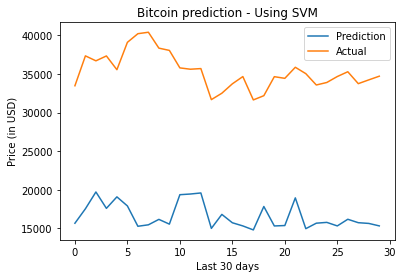

In [29]:
# Comparison plot for comparing 'Actual' and 'Predicted' values
plt.title('Bitcoin prediction - Using SVM')
plt.xlabel('Last 30 days')
plt.ylabel('Price (in USD)')
plt.plot(result_df_30days['Prediction'])

plt.plot(result_df_30days['Actual']);
plt.legend(['Prediction','Actual']);